# MECO

Feature extraction and data preparation for the MECO dataset

We chose the "joint_data_trimmed.dat" file in the MECO website (https://meco-read.com/).

Interesting paper that describe the dataset, https://link.springer.com/epdf/10.3758/s13428-021-01772-6?sharing_token=As4e3osuA15IaUCKtCvDT5AH0g46feNdnc402WrhzyoEtpF3alySPm1lAWocS1ewk9OZlpPc3CqibACC23iBC_nacc6BD4_GPYLuUZJAvfWHoa8e0hjmhhFn9fLIgIRd3VzSfjlcpQ3gS4EiUY2YpRXjDSh3hB5Zx5kZpkk4yIQ=.

## Import Libs and Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("joint_data_trimmed.csv", index_col=0)

We have chose to use the following features for each sample:

- **Skipping**: a binary index of whether the word was fixated at least once during the entire reading of the text [and not only during the first pass].
- **First Fixation**: the duration of the first fixation landing on the word.
- **Gaze Duration**: the summed duration of fixations on the word in the first pass, i.e., before the gaze leaves it for the first time.
- **Total Fixation Duration**: the summed duration of all fixations on the word.
- **First-run Number of Fixation**: the number of fixations on a word during the first pass.
- **Total Number of Fixations**: number of fixations on a word overall.
- **Regression**: a binary index of whether the gaze returned to the word after inspecting further textual material.
- **Rereading**: a binary index of whether the word elicited fixations after the first pass.


In [3]:
# following a paper cited on the MECO website, i will use a subset of the gaze features
gaze_features = ["skip", "firstfix.dur", "firstrun.dur", "dur", "firstrun.nfix", "nfix", "refix", "reread"]
basic_features = ["trialid", "sentnum", "ianum", "ia", "lang", "uniform_id"]
df = df[basic_features + gaze_features]

In [4]:
df.head()

,trialid,sentnum,ianum,ia,lang,uniform_id,skip,firstfix.dur,firstrun.dur,dur,firstrun.nfix,nfix,refix,reread
1,1.0,1.0,1.0,Janus,du,du_1,0.0,154.0,154.0,400.0,1.0,2.0,0.0,1.0
2,1.0,1.0,2.0,is,du,du_1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,3.0,in,du,du_1,0.0,551.0,551.0,551.0,1.0,1.0,0.0,0.0
4,1.0,1.0,4.0,de,du,du_1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,1.0,5.0,oude,du,du_1,0.0,189.0,189.0,439.0,1.0,2.0,0.0,1.0


## Data Understanding

We can notice that there are some Null elements, for the gaze_features except skip, those Null elements are in the rows with skip == 1, representing the fact that cannot be captured.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 855123 entries, 1 to 855123
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   trialid        855122 non-null  float64
 1   sentnum        855122 non-null  float64
 2   ianum          855122 non-null  float64
 3   ia             854741 non-null  object 
 4   lang           855122 non-null  object 
 5   uniform_id     855123 non-null  object 
 6   skip           855122 non-null  float64
 7   firstfix.dur   639530 non-null  float64
 8   firstrun.dur   639530 non-null  float64
 9   dur            639530 non-null  float64
 10  firstrun.nfix  639530 non-null  float64
 11  nfix           639530 non-null  float64
 12  refix          639454 non-null  float64
 13  reread         639530 non-null  float64
dtypes: float64(11), object(3)
memory usage: 97.9+ MB


In [6]:
df.describe()

,trialid,sentnum,ianum,skip,firstfix.dur,firstrun.dur,dur,firstrun.nfix,nfix,refix,reread
count,855122.000000,855122.000000,855122.000000,855122.000000,639530.000000,639530.000000,639530.000000,639530.000000,639530.000000,639454.000000,639530.000000
mean,6.319812,5.100584,84.710652,0.252118,214.771812,274.000635,396.190598,1.291295,1.870305,0.270565,0.315846
std,3.440210,2.697842,51.443266,0.434229,94.834265,181.464901,332.095123,0.666067,1.378493,0.444252,0.464852
min,1.000000,1.000000,1.000000,0.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000
25%,3.000000,3.000000,41.000000,0.000000,156.000000,171.000000,199.000000,1.000000,1.000000,0.000000,0.000000
50%,6.000000,5.000000,82.000000,0.000000,200.000000,229.000000,297.000000,1.000000,1.000000,0.000000,0.000000
75%,9.000000,7.000000,124.000000,1.000000,255.000000,324.000000,478.000000,1.000000,2.000000,1.000000,1.000000
max,12.000000,16.000000,243.000000,1.000000,12688.000000,12688.000000,15579.000000,44.000000,50.000000,1.000000,1.000000


In [7]:
df.lang.unique()

array(['du', 'ee', 'fi', 'ge', 'gr', 'he', 'it', 'ko', 'en', 'no', nan,
       'ru', 'sp', 'tr'], dtype=object)

Get a subset of languages, choosen look a the ones handled by mBERT (https://huggingface.co/bert-base-multilingual-cased).

- **German**
- **Italian**
- **Russian**
- **English**
- **Spanish**

In [8]:
# get only the languages that are necessary to the project
supported_languages = ["ge", "it", "ru", "en", "sp"]

In [9]:
df = df[df.lang.isin(supported_languages)]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 402904 entries, 193910 to 823179
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   trialid        402904 non-null  float64
 1   sentnum        402904 non-null  float64
 2   ianum          402904 non-null  float64
 3   ia             402834 non-null  object 
 4   lang           402904 non-null  object 
 5   uniform_id     402904 non-null  object 
 6   skip           402904 non-null  float64
 7   firstfix.dur   292582 non-null  float64
 8   firstrun.dur   292582 non-null  float64
 9   dur            292582 non-null  float64
 10  firstrun.nfix  292582 non-null  float64
 11  nfix           292582 non-null  float64
 12  refix          292539 non-null  float64
 13  reread         292582 non-null  float64
dtypes: float64(11), object(3)
memory usage: 46.1+ MB


In [11]:
df.head()

,trialid,sentnum,ianum,ia,lang,uniform_id,skip,firstfix.dur,firstrun.dur,dur,firstrun.nfix,nfix,refix,reread
193910,1.0,1.0,1.0,In,ge,ge_1,0.0,164.0,164.0,164.0,1.0,1.0,0.0,0.0
193911,1.0,1.0,2.0,der,ge,ge_1,0.0,166.0,166.0,657.0,1.0,3.0,0.0,1.0
193912,1.0,1.0,3.0,alten,ge,ge_1,0.0,144.0,144.0,717.0,1.0,3.0,0.0,1.0
193913,1.0,1.0,4.0,römischen,ge,ge_1,0.0,219.0,219.0,1231.0,1.0,6.0,0.0,1.0
193914,1.0,1.0,5.0,Religion,ge,ge_1,0.0,151.0,151.0,1338.0,1.0,8.0,1.0,1.0


Notice that in the samples' gaze_features with skip == 0 there aren't Null elements.

In [12]:
df[df.skip==0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292582 entries, 193910 to 823178
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   trialid        292582 non-null  float64
 1   sentnum        292582 non-null  float64
 2   ianum          292582 non-null  float64
 3   ia             292575 non-null  object 
 4   lang           292582 non-null  object 
 5   uniform_id     292582 non-null  object 
 6   skip           292582 non-null  float64
 7   firstfix.dur   292582 non-null  float64
 8   firstrun.dur   292582 non-null  float64
 9   dur            292582 non-null  float64
 10  firstrun.nfix  292582 non-null  float64
 11  nfix           292582 non-null  float64
 12  refix          292539 non-null  float64
 13  reread         292582 non-null  float64
dtypes: float64(11), object(3)
memory usage: 33.5+ MB


In [13]:
df[df.skip==1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110322 entries, 193926 to 823179
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   trialid        110322 non-null  float64
 1   sentnum        110322 non-null  float64
 2   ianum          110322 non-null  float64
 3   ia             110259 non-null  object 
 4   lang           110322 non-null  object 
 5   uniform_id     110322 non-null  object 
 6   skip           110322 non-null  float64
 7   firstfix.dur   0 non-null       float64
 8   firstrun.dur   0 non-null       float64
 9   dur            0 non-null       float64
 10  firstrun.nfix  0 non-null       float64
 11  nfix           0 non-null       float64
 12  refix          0 non-null       float64
 13  reread         0 non-null       float64
dtypes: float64(11), object(3)
memory usage: 12.6+ MB


Even more, there are some ia elements that are Null, we can see that most of them are not skipped words with a lot of Null elements, so we can drop them.

In [14]:
print("Probabilities of Null elements by columns, for the Null ia")
df[df.ia.isna()].isna().sum()/df[df.ia.isna()].shape[0]

Probabilities of Null elements by columns, for the Null ia


trialid          0.0
sentnum          0.0
ianum            0.0
ia               1.0
lang             0.0
uniform_id       0.0
skip             0.0
firstfix.dur     0.9
firstrun.dur     0.9
dur              0.9
firstrun.nfix    0.9
nfix             0.9
refix            0.9
reread           0.9
dtype: float64

In [15]:
df = df[~df.ia.isna()]

Fill gaze features of the skipped words with 0.

In [16]:
df = df.fillna(0)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 402834 entries, 193910 to 823179
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   trialid        402834 non-null  float64
 1   sentnum        402834 non-null  float64
 2   ianum          402834 non-null  float64
 3   ia             402834 non-null  object 
 4   lang           402834 non-null  object 
 5   uniform_id     402834 non-null  object 
 6   skip           402834 non-null  float64
 7   firstfix.dur   402834 non-null  float64
 8   firstrun.dur   402834 non-null  float64
 9   dur            402834 non-null  float64
 10  firstrun.nfix  402834 non-null  float64
 11  nfix           402834 non-null  float64
 12  refix          402834 non-null  float64
 13  reread         402834 non-null  float64
dtypes: float64(11), object(3)
memory usage: 46.1+ MB


In [18]:
df[["skip", "firstrun.dur", "dur", "firstrun.nfix", "nfix", "refix", "reread"]].corr()

,skip,firstrun.dur,dur,firstrun.nfix,nfix,refix,reread
skip,1.000000,-0.652214,-0.543305,-0.741110,-0.587836,-0.287592,-0.333861
firstrun.dur,-0.652214,1.000000,0.720569,0.860484,0.616886,0.554956,0.224649
dur,-0.543305,0.720569,1.000000,0.648870,0.923882,0.555678,0.629876
firstrun.nfix,-0.741110,0.860484,0.648870,1.000000,0.712458,0.682079,0.256612
nfix,-0.587836,0.616886,0.923882,0.712458,1.000000,0.631961,0.685371
refix,-0.287592,0.554956,0.555678,0.682079,0.631961,1.000000,0.249470
reread,-0.333861,0.224649,0.629876,0.256612,0.685371,0.249470,1.000000


In [19]:
def group_by_users(dataset):
    group_by_cols = ["trialid", "sentnum", "ianum", "ia", "lang"]
    grouped_cols = ["skip", "firstfix.dur", "firstrun.dur", "dur", "firstrun.nfix", "nfix", "refix", "reread"]

    grouped_clusterd_df = dataset.groupby(group_by_cols)[grouped_cols].mean()

    grouped_clusterd_df = grouped_clusterd_df.reset_index(level=0).reset_index(level=0).reset_index(level=0).reset_index(level=0).reset_index(level=0)

    grouped_clusterd_df["trial_sentnum"] = grouped_clusterd_df["sentnum"]
    grouped_clusterd_df["sentnum"] = grouped_clusterd_df["sentnum"].astype("string") + grouped_clusterd_df["trialid"].astype("string") + grouped_clusterd_df["lang"].astype("string")
    grouped_clusterd_df.sentnum = grouped_clusterd_df.sentnum.astype('category').cat.codes

    word_func = lambda s: [w for w in s["ia"].values.tolist()]
    sentences = grouped_clusterd_df.groupby("sentnum").apply(word_func).tolist()
    print(f"Number of sentence after group : {len(sentences)}")

    return grouped_clusterd_df


In [20]:
grouped_clusterd_df_0 = group_by_users(df)

Number of sentence after group : 511


In [21]:
grouped_clusterd_df_0.shape

(11908, 14)

In [22]:
grouped_clusterd_df_0.rename(columns={"skip" : "prob_skip", "refix" : "prob_refix", "reread" : "prob_reread"}, inplace=True)

grouped_clusterd_df_0.ianum = grouped_clusterd_df_0.ianum.astype(int)
grouped_clusterd_df_0.trialid = grouped_clusterd_df_0.trialid.astype(int)
grouped_clusterd_df_0.trial_sentnum = grouped_clusterd_df_0.trial_sentnum.astype(int)

In [23]:
grouped_clusterd_df_0.head()

,lang,ia,ianum,sentnum,trialid,prob_skip,firstfix.dur,firstrun.dur,dur,firstrun.nfix,nfix,prob_refix,prob_reread,trial_sentnum
0,sp,En,1,4,1,0.342105,95.842105,98.842105,128.973684,0.684211,0.815789,0.026316,0.078947,1
1,en,In,1,0,1,0.605263,45.236842,52.631579,76.789474,0.421053,0.526316,0.026316,0.078947,1
2,ge,In,1,1,1,0.342857,97.971429,97.971429,115.000000,0.657143,0.742857,0.000000,0.057143,1
3,it,Negli,1,2,1,0.116279,127.511628,138.465116,301.860465,0.976744,1.790698,0.139535,0.511628,1
4,ru,Янус,1,3,1,0.029412,167.411765,281.823529,479.411765,1.352941,1.970588,0.294118,0.323529,1


In [24]:
grouped_clusterd_df_0[["prob_skip", "firstrun.dur", "dur", "firstrun.nfix", "nfix", "prob_refix", "prob_reread"]].corr()

,prob_skip,firstrun.dur,dur,firstrun.nfix,nfix,prob_refix,prob_reread
prob_skip,1.000000,-0.778231,-0.731378,-0.828764,-0.772671,-0.574849,-0.600154
firstrun.dur,-0.778231,1.000000,0.876370,0.937817,0.835661,0.787060,0.515920
dur,-0.731378,0.876370,1.000000,0.849587,0.961604,0.790050,0.771978
firstrun.nfix,-0.828764,0.937817,0.849587,1.000000,0.891440,0.840413,0.549345
nfix,-0.772671,0.835661,0.961604,0.891440,1.000000,0.827222,0.801388
prob_refix,-0.574849,0.787060,0.790050,0.840413,0.827222,1.000000,0.524673
prob_reread,-0.600154,0.515920,0.771978,0.549345,0.801388,0.524673,1.000000


In [25]:
grouped_clusterd_df_0.to_csv(f"datasets/all_mean_dataset.csv")

## Clean Users

Getting the users who are in all the trial

In [26]:
print(f"Number of total readers in the dataset {len(set(df.uniform_id.unique()))}")

Number of total readers in the dataset 239


In [27]:
# not all the readers appear in all the trial

trial_readers = df.groupby("trialid").uniform_id.unique()

for i, trial in enumerate(trial_readers):
    print(f"Number of different users in trial {i+1} : {len(trial)}")

Number of different users in trial 1 : 188
Number of different users in trial 2 : 190
Number of different users in trial 3 : 200
Number of different users in trial 4 : 198
Number of different users in trial 5 : 191
Number of different users in trial 6 : 187
Number of different users in trial 7 : 197
Number of different users in trial 8 : 183
Number of different users in trial 9 : 194
Number of different users in trial 10 : 186
Number of different users in trial 11 : 203
Number of different users in trial 12 : 182


In [28]:
sets_trial_readers = []
for trial in trial_readers:
    sets_trial_readers.append(set(trial))

common_users = set.intersection(*sets_trial_readers)

In [29]:
print(f"Number of users that are in all trials {len(set(common_users))}")

Number of users that are in all trials 69


In [30]:
# count the sentences of the users present in all the trials
grouped_clusterd_df_2 = group_by_users(df[df.uniform_id.isin(common_users)])

Number of sentence after group : 503


In [31]:
grouped_clusterd_df_2.shape

(10489, 14)

Getting the Participants who have read all the token in all sentences in each trial

In [32]:
# Getting the Participants who have read all sentences in each trial
# all the users that have read all the text in the trial where they are

uncomplete_users = set()

for i in df.trialid.unique():
    
    df_trial = df[df.trialid==i]
        
    for lang in df.lang.unique():
        
        df_lang_trial = df_trial[df_trial.lang == lang]
        
        total_sentences_trial = set(df_lang_trial.sentnum.unique())
        
        for user, sentences in df_lang_trial.groupby("uniform_id").sentnum.unique().items():
            if set(sentences) != total_sentences_trial:
                uncomplete_users.add(user)
                
complete_users = set(df.uniform_id.unique()) - uncomplete_users

In [33]:
print(f"Number of the users that have read all the sentences in the trial where they are {len(complete_users)}")

Number of the users that have read all the sentences in the trial where they are 171


In [34]:
# count the sentences of the users that read all the sentences in all the trials where they are

grouped_clusterd_df_3 = group_by_users(df[df.uniform_id.isin(complete_users)])

Number of sentence after group : 491


In [35]:
grouped_clusterd_df_3.shape

(10210, 14)

Intersect the common and complete users

In [36]:
complete_common_users = complete_users.intersection(common_users)

In [37]:
print(f"Number of the users that have read all the sentences in the trials {len(complete_common_users)}")

Number of the users that have read all the sentences in the trials 36


In [38]:
complete_common_users

{'ge_1',
 'ge_10',
 'ge_12',
 'ge_13',
 'ge_17',
 'ge_3',
 'ge_30',
 'ge_32',
 'ge_37',
 'ge_39',
 'ge_41',
 'ge_47',
 'ge_53',
 'ge_6',
 'ge_8',
 'ge_9',
 'it_11',
 'it_13',
 'it_17',
 'it_21',
 'it_26',
 'it_3',
 'it_36',
 'it_37',
 'it_48',
 'sp_18',
 'sp_34',
 'sp_37',
 'sp_38',
 'sp_4',
 'sp_42',
 'sp_48',
 'sp_51',
 'sp_54',
 'sp_56',
 'sp_61'}

In [39]:
# count the sentences of the users that read all the sentences in all the trials

grouped_clusterd_df_4 = group_by_users(df[df.uniform_id.isin(complete_common_users)])

Number of sentence after group : 303


In [40]:
grouped_clusterd_df_4.shape

(6551, 14)

In [41]:
df_complete_common_user = df[df.uniform_id.isin(complete_common_users)]

# Clustering Users

We need to cluster users to handle separate readers behaviours, since the fact that the grouped features have different correlation matrix wrt to non grouped data.

## Profiling the Users

First of all we have to see if each trial havethe same users

In [42]:
df_complete_common_user.head()

,trialid,sentnum,ianum,ia,lang,uniform_id,skip,firstfix.dur,firstrun.dur,dur,firstrun.nfix,nfix,refix,reread
193910,1.0,1.0,1.0,In,ge,ge_1,0.0,164.0,164.0,164.0,1.0,1.0,0.0,0.0
193911,1.0,1.0,2.0,der,ge,ge_1,0.0,166.0,166.0,657.0,1.0,3.0,0.0,1.0
193912,1.0,1.0,3.0,alten,ge,ge_1,0.0,144.0,144.0,717.0,1.0,3.0,0.0,1.0
193913,1.0,1.0,4.0,römischen,ge,ge_1,0.0,219.0,219.0,1231.0,1.0,6.0,0.0,1.0
193914,1.0,1.0,5.0,Religion,ge,ge_1,0.0,151.0,151.0,1338.0,1.0,8.0,1.0,1.0


The trials doesn't contain the same readers

In [43]:
reader_grouped_df = df_complete_common_user.groupby(["uniform_id", "lang"])[gaze_features].mean().reset_index(level=0).reset_index(level=0)

In [44]:
reader_grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   lang           36 non-null     object 
 1   uniform_id     36 non-null     object 
 2   skip           36 non-null     float64
 3   firstfix.dur   36 non-null     float64
 4   firstrun.dur   36 non-null     float64
 5   dur            36 non-null     float64
 6   firstrun.nfix  36 non-null     float64
 7   nfix           36 non-null     float64
 8   refix          36 non-null     float64
 9   reread         36 non-null     float64
dtypes: float64(8), object(2)
memory usage: 2.9+ KB


In [45]:
reader_grouped_df.uniform_id.unique()

array(['ge_1', 'ge_10', 'ge_12', 'ge_13', 'ge_17', 'ge_3', 'ge_30',
       'ge_32', 'ge_37', 'ge_39', 'ge_41', 'ge_47', 'ge_53', 'ge_6',
       'ge_8', 'ge_9', 'it_11', 'it_13', 'it_17', 'it_21', 'it_26',
       'it_3', 'it_36', 'it_37', 'it_48', 'sp_18', 'sp_34', 'sp_37',
       'sp_38', 'sp_4', 'sp_42', 'sp_48', 'sp_51', 'sp_54', 'sp_56',
       'sp_61'], dtype=object)

In [46]:
reader_grouped_df[gaze_features].corr()

,skip,firstfix.dur,firstrun.dur,dur,firstrun.nfix,nfix,refix,reread
skip,1.000000,-0.614045,-0.707910,-0.408043,-0.882127,-0.510799,-0.652682,-0.201618
firstfix.dur,-0.614045,1.000000,0.897394,0.614098,0.484091,0.370940,0.319923,0.190239
firstrun.dur,-0.707910,0.897394,1.000000,0.559480,0.761146,0.394787,0.662981,0.086346
dur,-0.408043,0.614098,0.559480,1.000000,0.319464,0.911931,0.425672,0.832086
firstrun.nfix,-0.882127,0.484091,0.761146,0.319464,1.000000,0.429593,0.901798,0.041722
nfix,-0.510799,0.370940,0.394787,0.911931,0.429593,1.000000,0.539666,0.894908
refix,-0.652682,0.319923,0.662981,0.425672,0.901798,0.539666,1.000000,0.188820
reread,-0.201618,0.190239,0.086346,0.832086,0.041722,0.894908,0.188820,1.000000


### Apply K-means to clusterize our datas

In [47]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tqdm import tqdm
import matplotlib.pyplot as plt

In [48]:
scaler = MinMaxScaler()

X = scaler.fit_transform(reader_grouped_df[gaze_features].values)

In [49]:
sse_list = list()
separations = list()
silouettes_ = list()

max_k = 7
for k in tqdm(range(2, max_k + 1)):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(X)
    
    sse = kmeans.inertia_
    sse_list.append(sse)
    separations.append(metrics.davies_bouldin_score(X, kmeans.labels_))
    silouettes_.append(silhouette_score(X, kmeans.labels_))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 42.40it/s]


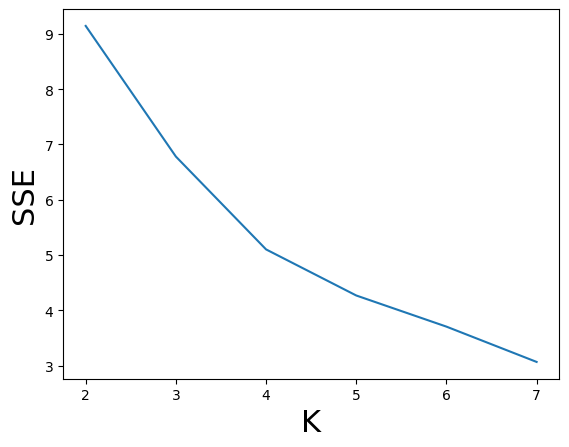

In [50]:
plt.plot(range(2, len(sse_list) + 2), sse_list)
plt.ylabel('SSE', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.xticks(range(2, len(sse_list) + 2))
plt.show()

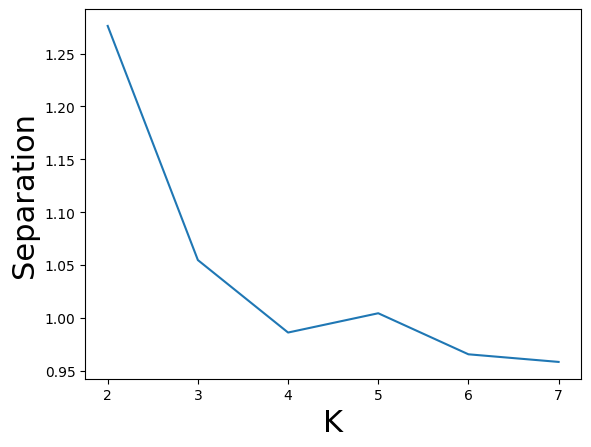

In [51]:
plt.plot(range(2, len(separations) + 2), separations)
plt.ylabel('Separation', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.xticks(range(2, len(separations) + 2))
plt.show()

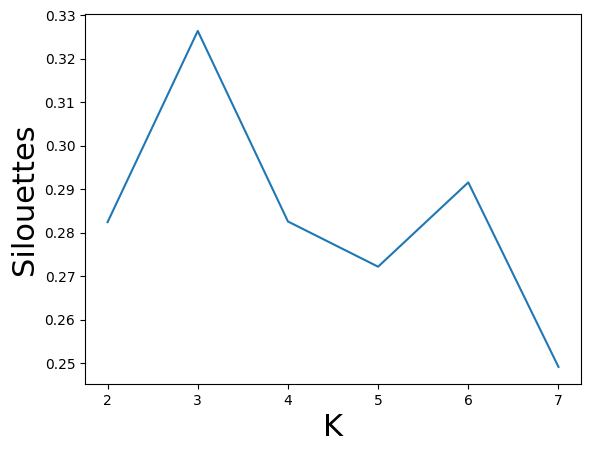

In [52]:
plt.plot(range(2, len(silouettes_) + 2), silouettes_)
plt.ylabel('Silouettes', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.xticks(range(2, len(silouettes_) + 2))
plt.show()

In [53]:
selected_k=3

kmeans = KMeans(n_clusters=selected_k, n_init=100, max_iter=500)
kmeans.fit(X)

KMeans(max_iter=500, n_clusters=3, n_init=100)

In [54]:
# sum up the metrics

print(f"SSE : {kmeans.inertia_}")
print(f"Separation : {metrics.davies_bouldin_score(X, kmeans.labels_)}")
print(f"Silhouette : {silhouette_score(X, kmeans.labels_)}")

SSE : 6.751348507219689
Separation : 1.1478912774543044
Silhouette : 0.24616860278593297


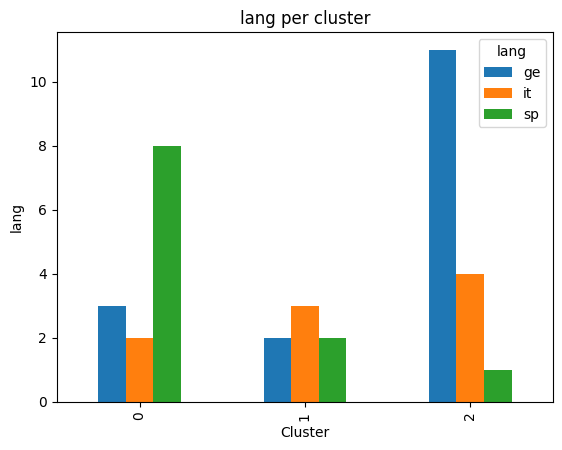

In [55]:
bot_xt_pct = pd.crosstab(kmeans.labels_, reader_grouped_df["lang"])
bot_xt_pct.plot(kind='bar', stacked=False, 
                   title=f'lang per cluster')
plt.xlabel('Cluster')
plt.ylabel("lang")
plt.show()

In [56]:
center = scaler.inverse_transform(kmeans.cluster_centers_)

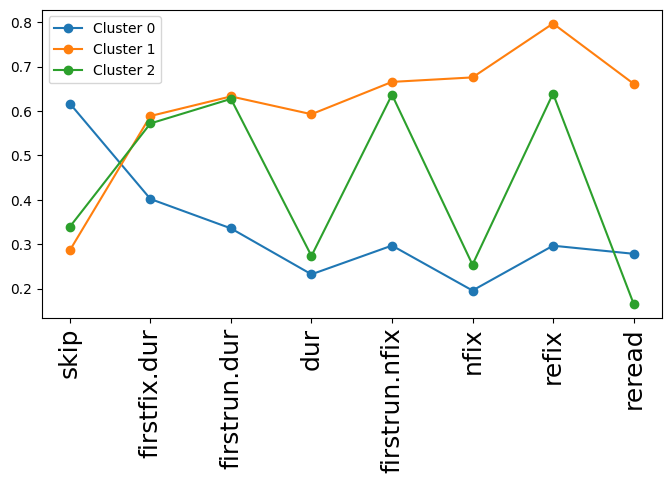

In [57]:
plt.figure(figsize=(8, 4))
for i in range(0, len(center)):
    plt.plot(kmeans.cluster_centers_[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xticks(range(0, len(gaze_features)), gaze_features, fontsize=18, rotation=90)
plt.legend(fontsize=10)
plt.show()

In [58]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

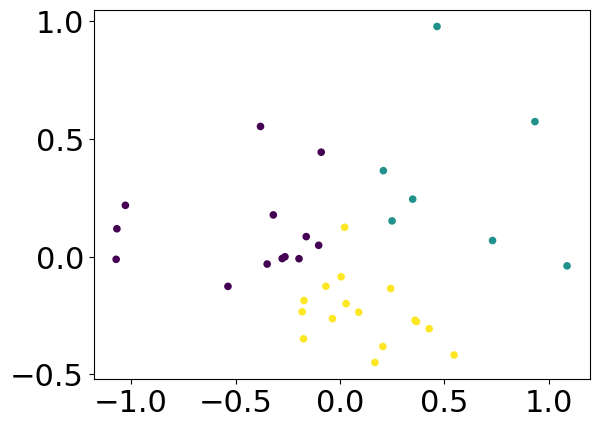

In [59]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=kmeans.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

### Creating one dataset per cluster

In [60]:
readers_clusters = list()

for i in range(selected_k):
    readers_clusters.append(set(reader_grouped_df.loc[kmeans.labels_ == i, "uniform_id"]))
    
print(readers_clusters)

[{'sp_54', 'sp_37', 'sp_56', 'it_13', 'ge_41', 'it_21', 'sp_18', 'sp_42', 'sp_61', 'sp_48', 'sp_38', 'ge_37', 'ge_1'}, {'sp_34', 'sp_51', 'it_37', 'ge_17', 'it_3', 'it_36', 'ge_6'}, {'it_26', 'ge_3', 'ge_32', 'it_17', 'ge_30', 'ge_9', 'it_11', 'ge_13', 'ge_12', 'ge_53', 'ge_8', 'it_48', 'ge_39', 'ge_47', 'sp_4', 'ge_10'}]


In [61]:
clustered_dfs = list()

for readers_cluster in readers_clusters:
    clustered_df = df_complete_common_user[df_complete_common_user.uniform_id.isin(readers_cluster)]
    clustered_dfs.append(clustered_df)

In [62]:
clustered_dfs

[        trialid  sentnum  ianum         ia lang uniform_id  skip  \
 193910      1.0      1.0    1.0         In   ge       ge_1   0.0   
 193911      1.0      1.0    2.0        der   ge       ge_1   0.0   
 193912      1.0      1.0    3.0      alten   ge       ge_1   0.0   
 193913      1.0      1.0    4.0  römischen   ge       ge_1   0.0   
 193914      1.0      1.0    5.0   Religion   ge       ge_1   0.0   
 ...         ...      ...    ...        ...  ...        ...   ...   
 821161     12.0      1.0    5.0   vehículo   sp      sp_61   0.0   
 821162     12.0      1.0    6.0         es   sp      sp_61   1.0   
 821163     12.0      1.0    7.0        una   sp      sp_61   1.0   
 821164     12.0      1.0    8.0      placa   sp      sp_61   0.0   
 821165     12.0      1.0    9.0         de   sp      sp_61   1.0   
 
         firstfix.dur  firstrun.dur     dur  firstrun.nfix  nfix  refix  reread  
 193910         164.0         164.0   164.0            1.0   1.0    0.0     0.0  
 19391

### Mean gaze features inside each clustered dataset

In [63]:
group_by_cols = ["trialid", "sentnum", "ianum", "ia", "lang"]
grouped_cols = ["skip", "firstfix.dur", "firstrun.dur", "dur", "firstrun.nfix", "nfix", "refix", "reread"]

for i in range(len(clustered_dfs)):    
    grouped_clusterd_df = group_by_users(clustered_dfs[i])
    
    grouped_clusterd_df.rename(columns={"skip" : "prob_skip", "refix" : "prob_refix", "reread" : "prob_reread"}, inplace=True)
    
    grouped_clusterd_df.ianum = grouped_clusterd_df.ianum.astype(int)
    grouped_clusterd_df.trialid = grouped_clusterd_df.trialid.astype(int)
    grouped_clusterd_df.trial_sentnum = grouped_clusterd_df.trial_sentnum.astype(int)
    
    clustered_dfs[i] = grouped_clusterd_df

Number of sentence after group : 303
Number of sentence after group : 303
Number of sentence after group : 303


In [64]:
for clustered_df in clustered_dfs:
    print(clustered_df[["prob_skip", "firstrun.dur", "dur", "firstrun.nfix", "nfix", "prob_refix", "prob_reread"]].corr())

               prob_skip  firstrun.dur       dur  firstrun.nfix      nfix  \
prob_skip       1.000000     -0.800721 -0.701679      -0.864895 -0.738097   
firstrun.dur   -0.800721      1.000000  0.837873       0.918668  0.781887   
dur            -0.701679      0.837873  1.000000       0.790040  0.959729   
firstrun.nfix  -0.864895      0.918668  0.790040       1.000000  0.831973   
nfix           -0.738097      0.781887  0.959729       0.831973  1.000000   
prob_refix     -0.426250      0.666394  0.675870       0.738137  0.721604   
prob_reread    -0.476824      0.445125  0.748016       0.455372  0.777170   

               prob_refix  prob_reread  
prob_skip       -0.426250    -0.476824  
firstrun.dur     0.666394     0.445125  
dur              0.675870     0.748016  
firstrun.nfix    0.738137     0.455372  
nfix             0.721604     0.777170  
prob_refix       1.000000     0.384278  
prob_reread      0.384278     1.000000  
               prob_skip  firstrun.dur       dur  first

In [65]:
for i, clustered_df in enumerate(clustered_dfs):
    print(f"Len dataset_{i} : {clustered_df.shape}")

Len dataset_0 : (6551, 14)
Len dataset_1 : (6551, 14)
Len dataset_2 : (6551, 14)


### Saving datasets

In [66]:
for i, clustered_df in enumerate(clustered_dfs):
    clustered_df.to_csv(f"datasets/cluster_{i}_dataset.csv")

### see distribution of data based on trial id

we can use last twe trial to compute validation and test set

In [67]:
for i, clustered_df in enumerate(clustered_dfs):
    
    print(f"\t--- Cluster {i} ---")
    
    for trial in df.trialid.unique():
        print(f"Percentage of samples in {trial}-th trial : {np.sum(clustered_df.trialid == trial)/clustered_df.shape[0]:.2f}%")

    print()

	--- Cluster 0 ---
Percentage of samples in 1.0-th trial : 0.09%
Percentage of samples in 2.0-th trial : 0.08%
Percentage of samples in 3.0-th trial : 0.10%
Percentage of samples in 4.0-th trial : 0.08%
Percentage of samples in 5.0-th trial : 0.07%
Percentage of samples in 6.0-th trial : 0.08%
Percentage of samples in 7.0-th trial : 0.10%
Percentage of samples in 8.0-th trial : 0.07%
Percentage of samples in 9.0-th trial : 0.08%
Percentage of samples in 10.0-th trial : 0.09%
Percentage of samples in 11.0-th trial : 0.09%
Percentage of samples in 12.0-th trial : 0.08%

	--- Cluster 1 ---
Percentage of samples in 1.0-th trial : 0.09%
Percentage of samples in 2.0-th trial : 0.08%
Percentage of samples in 3.0-th trial : 0.10%
Percentage of samples in 4.0-th trial : 0.08%
Percentage of samples in 5.0-th trial : 0.07%
Percentage of samples in 6.0-th trial : 0.08%
Percentage of samples in 7.0-th trial : 0.10%
Percentage of samples in 8.0-th trial : 0.07%
Percentage of samples in 9.0-th trial 